In [11]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import scipy.stats

%matplotlib inline

In [14]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
gapminder = pd.read_csv('gapminder.csv')

In [3]:
gdata = gapminder[gapminder.year==1985]

In [4]:
gdata.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
50,Afghanistan,1985,Asia,11630498.0,45.21,78.400,7.68,1384.0,3.789185
131,Albania,1985,Europe,2966799.0,72.71,94.570,3.23,4267.0,11.682409
212,Algeria,1985,Africa,22565908.0,67.18,92.880,5.98,11030.0,30.198494
293,Angola,1985,Africa,9745209.0,47.50,77.170,7.21,4117.0,11.271732
374,Antigua and Barbuda,1985,America,65744.0,72.13,96.946,2.09,11383.0,31.164956


In [7]:
size = 1e-6 * gdata.population
colors = gdata.region.map({'Africa':'skyblue', 'Europe':'gold', 'America':'palegreen', 'Asia':'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving', 'babies_per_woman', 
                       c=colors, s=size,linewidth=0.5, edgecolor='k', alpha=0.5)

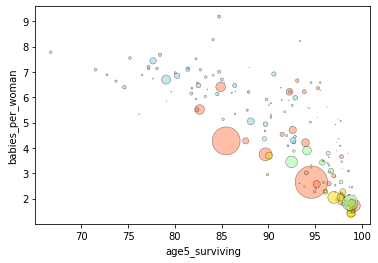

In [8]:
plotdata()

In [15]:
model = smf.ols(formula = 'babies_per_woman ~ 1', data=gdata)

In [16]:
grandmean = model.fit()

In [17]:
grandmean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                nan
Time:                        10:42:51   Log-Likelihood:                -385.08
No. Observations:                 182   AIC:                             772.2
Df Residuals:                     181   BIC:                             775.4
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3607      0.149     29.224      0.000       4.066       4.655
==============================================================================
Omnibus:                      152.832   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.199
Skew:                           0.103   Prob(JB):                      0.00136
Kurtosis:                       1.697   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
def plotfit(fit):
    plotdata()
    plt.scatter(gdata.age5_surviving, grandmean.predict(gdata), 
               c=colors, s=30, linewidths=0.5, edgecolor='k', marker='D')

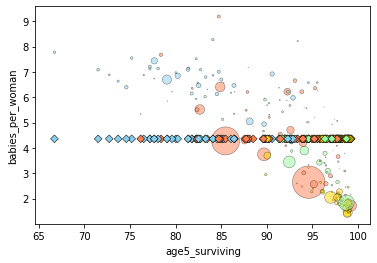

In [20]:
plotfit(grandmean)

In [21]:
grandmean.params

Intercept    4.360714
dtype: float64

In [22]:
gdata.babies_per_woman.mean()

4.360714285714287

In [28]:
groupmeans = smf.ols(formula='babies_per_woman ~ 1 + region', data=gdata).fit()

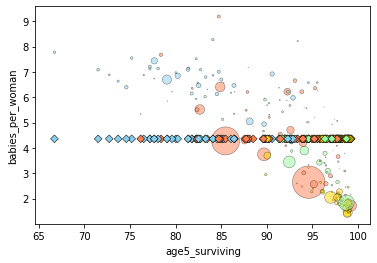

In [29]:
plotfit(groupmeans)

In [30]:
groupmeans.params

Intercept            6.321321
region[T.America]   -2.663139
region[T.Asia]      -1.545744
region[T.Europe]    -4.285639
dtype: float64

In [31]:
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region', data=gdata).fit()

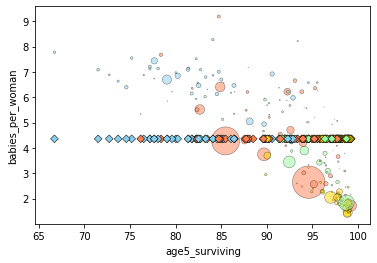

In [32]:
plotfit(groupmeans)


In [33]:
groupmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

In [34]:
gdata.groupby('region').babies_per_woman.mean()

region
Africa     6.321321
America    3.658182
Asia       4.775577
Europe     2.035682
Name: babies_per_woman, dtype: float64

In [35]:
surviving = smf.ols(formula = 'babies_per_woman ~ -1 + region + age5_surviving', data=gdata).fit()

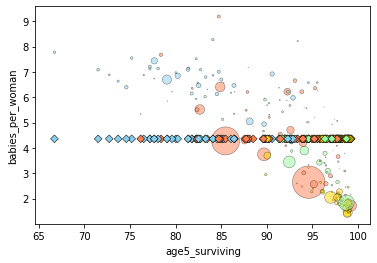

In [36]:
plotfit(surviving)

In [37]:
surviving.params

region[Africa]     18.265792
region[America]    17.085884
region[Asia]       17.864741
region[Europe]     15.872183
age5_surviving     -0.141886
dtype: float64

In [38]:
surviving_byregion = smf.ols('babies_per_woman ~ -1 + age5_surviving:region', data=gdata).fit()

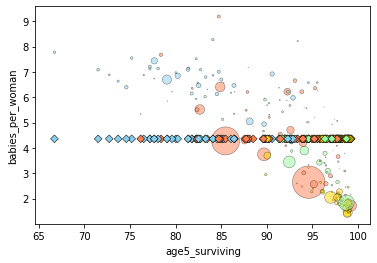

In [39]:
plotfit(surviving_byregion)

In [40]:
surviving_byregion.params

age5_surviving:region[Africa]     0.073871
age5_surviving:region[America]    0.038227
age5_surviving:region[Asia]       0.050909
age5_surviving:region[Europe]     0.020779
dtype: float64

In [42]:
surviving_byregion_population = smf.ols('babies_per_woman ~ -1 + age5_surviving:region + population', data=gdata).fit()

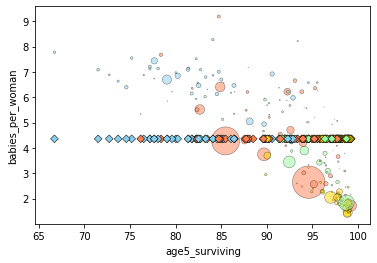

In [43]:
plotfit(surviving_byregion_population)

In [44]:
surviving_byregion_population.params

age5_surviving:region[Africa]     7.408571e-02
age5_surviving:region[America]    3.861287e-02
age5_surviving:region[Asia]       5.194557e-02
age5_surviving:region[Europe]     2.110127e-02
population                       -1.789535e-09
dtype: float64